# Medicare.Gov Data Exploration
#### Objectives:
1. Connect to Socrata Open Data API (SODA)
    - Post-Acute Facilties: 
        - https://data.medicare.gov/Nursing-Home-Compare/Provider-Info/4pq5-n9py
    - Penalties or fines: 
        - https://data.medicare.gov/Nursing-Home-Compare/Penalties/g6vv-u9sr
    - Long Term Care Minimum Data's quality Measures:
        - https://data.medicare.gov/Nursing-Home-Compare/MDS-Quality-Measures/djen-97ju
    - Center for Medicare and Medicaid Services Star Rating: 
        - https://data.medicare.gov/Nursing-Home-Compare/Star-Ratings/ax9d-vq6k
    
2. Run initial exploratory data analysis and ask the following questions:
    1. What are some frequency counts of interest?
    2. What are some trends that show high, low, increases, decreases, or outliers?
    3. What do histograms display?
    4. What are some quantities to compare?
    5. What scatter plots are interesting?
    6. What time of time series data trends are interesting?
3. What are some initial hypotheses or insights? What should I investigate next?
4. Data presentation
    - What are some ways to narrate this data?
    - What additional data do I need to make this story more complete?


## Setting up
- Load libraries
- set paths
- read data

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline

# Read Provider
info = 'https://data.medicare.gov/resource/b27b-2uc7.json?$select='
info_cols = pd.Series([
    'federal_provider_number','provider_name','provider_state','provider_city','ownership_type',
    'number_of_certified_beds','number_of_residents_in_certified_beds','overall_rating','total_weighted_health_survey_score',
    'number_of_substantiated_complaints', 'number_of_fines', 'total_amount_of_fines_in_dollars',
    'number_of_payment_denials', 'total_number_of_penalties']).str.cat(sep = ',')
info = pd.read_json(info+info_cols).set_index('federal_provider_number').sort_index()

# Read Penalty
fines = 'https://data.medicare.gov/resource/im9k-ugyp.json?$select='
fines_cols = pd.Series(['federal_provider_number','penalty_date','penalty_type','fine_amount']).str.cat(sep = ',')
fines = pd.read_json(fines+fines_cols).set_index('federal_provider_number').sort_index()

# Read MDS
mds = 'https://data.medicare.gov/resource/adup-8cbx.json?$select='
mds_cols = pd.Series([
    'federal_provider_number',
    'measure_code',
    'measure_description','resident_type',
    'three_quarter_average']).str.cat(sep = ',')
mds = pd.read_json(mds + mds_cols).set_index('federal_provider_number').sort_index()

# Read Star
star = 'https://data.medicare.gov/resource/ax9d-vq6k.json?$select='
star_cols = pd.Series(['federal_provider_number','health_inspection_rating','qm_rating','staffing_rating','rn_staffing_rating']).str.cat(sep = ',')
star = pd.read_json(star+star_cols).set_index('federal_provider_number').sort_index()


#### column_selection



In [2]:
info.occupancy_rate = info.number_of_residents_in_certified_beds/info.number_of_certified_beds

In [3]:
info.head()

,number_of_certified_beds,number_of_fines,number_of_payment_denials,number_of_residents_in_certified_beds,number_of_substantiated_complaints,overall_rating,ownership_type,provider_city,provider_name,provider_state,total_amount_of_fines_in_dollars,total_number_of_penalties,total_weighted_health_survey_score
federal_provider_number,,,,,,,,,,,,,
015014,92,0,0,82,1,2.0,For profit - Corporation,BIRMINGHAM,EASTVIEW REHABILITATION & HEALTHCARE CENTER,AL,0,0,36.000
015016,149,0,0,126,1,4.0,For profit - Corporation,ATHENS,ATHENS HEALTH AND REHABILITATION LLC,AL,0,0,33.333
015034,78,0,0,68,0,3.0,For profit - Corporation,NORTHPORT,"HUNTER CREEK HEALTH AND REHABILITATION, LLC",AL,0,0,32.000
015044,64,0,0,54,0,5.0,For profit - Corporation,PLEASANT GROVE,"CAREGIVERS OF PLEASANT GROVE, INC",AL,0,0,16.000
015076,197,0,0,184,2,1.0,Non profit - Other,BIRMINGHAM,FAIR HAVEN,AL,0,0,70.000


In [4]:
owner_rating = pd.crosstab(
    info.ownership_type,
    info.overall_rating,
    normalize = 'index' ) # "index" for rows, 'columns' for columns

owner_rating



overall_rating,1.0,2.0,3.0,4.0,5.0
ownership_type,,,,,
For profit - Corporation,0.170772,0.206897,0.182266,0.236453,0.203612
For profit - Individual,0.102041,0.306122,0.183673,0.183673,0.224490
For profit - Limited Liability company,0.333333,0.444444,0.000000,0.111111,0.111111
For profit - Partnership,0.169492,0.254237,0.169492,0.203390,0.203390
Government - City,0.200000,0.200000,0.000000,0.200000,0.400000
Government - City/county,0.000000,0.000000,0.000000,1.000000,0.000000
Government - County,0.166667,0.027778,0.083333,0.277778,0.444444
Government - Federal,0.000000,0.500000,0.000000,0.000000,0.500000
Government - Hospital district,0.230769,0.230769,0.153846,0.076923,0.307692


In [50]:
info = info.merge(mds[['three_quarter_average']], left_index= True, right_index=True)

In [51]:
# http://pbpython.com/pandas-pivot-table-explained.html
table_bed_capacity = info.pivot_table(
    index = ['provider_state'],
    columns = ['provider_city'],
    values = ['number_of_residents_in_certified_beds', 'number_of_certified_beds','three_quarter_average'],    
     aggfunc={
         'number_of_residents_in_certified_beds':np.sum,
          'number_of_certified_beds':np.sum,
         'three_quarter_average':np.mean       
     },
    fill_value=0,
    margins = True)

table_bed_capacity = table_bed_capacity.stack('provider_city')
table_bed_capacity = table_bed_capacity.query('number_of_residents_in_certified_beds != 0')
table_bed_capacity['rate'] = table_bed_capacity.number_of_residents_in_certified_beds/table_bed_capacity.number_of_certified_beds
table_bed_capacity_wo_all = table_bed_capacity.query("provider_city != ['All'] & provider_state != ['All']")
table_bed_capacity_wo_all.sort_values('rate', ascending = 0)
mean_rate = sum(table_bed_capacity_wo_all.number_of_residents_in_certified_beds)/sum(table_bed_capacity_wo_all.number_of_certified_beds)
table_bed_capacity_wo_all['low_high'] = np.where(table_bed_capacity_wo_all.rate >= mean_rate, '1','0')
table_bed_capacity_wo_all

C:\Users\Cglan\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


number_of_certified_beds  \
provider_state provider_city                                
AZ             LAKE HAVASU CITY                     118.0   
CA             OAKDALE                              115.0   
               PLACERVILLE                           68.0   
               SAN BERNARDINO                       332.0   
CT             BRISTOL                               90.0   
FL             SEBRING                              120.0   
               STARKE                               120.0   
GA             GLENNVILLE                           160.0   
HI             WAIANAE                               93.0   
IA             DES MOINES                            16.0   
IL             CARLYLE                              109.0   
               EFFINGHAM                            154.0   
               ELGIN                                102.0   
               LA GRANGE PARK                        86.0   
               MARENGO                               56.0   
               NASHVILLE                            150.0   
               WHITE HALL                           119.0   
IN             GAS CITY                              75.0   
               INDIANAPOLIS                         160.0   
KY             GREENSBURG                           118.0   
               MASONIC HOME                         167.0   
LA             DEQUINCY                              80.0   
MA             SANDWICH                             246.0   
               SCITUATE                             117.0   
ME             MILBRIDGE                             35.0   
MI             GRAND RAPIDS                          55.0   
MN             COON RAPIDS                           99.0   
               GREENBUSH                             40.0   
               LAKE CITY                             90.0   
               MINNEAPOLIS                          212.0   
...                                                   ...   
NE             GRAND ISLAND                          95.0   
               LINCOLN                               97.0   
               MITCHELL                              50.0   
NJ             ABSECON                              162.0   
NY             BRONX                                199.0   
               BROOKLYN                             200.0   
               MANHATTAN                           1389.0   
               NEWARK                               182.0   
               SYRACUSE                             513.0   
OH             ALLIANCE                              45.0   
               BETHEL                                18.0   
OK             HOLDENVILLE                          118.0   
PA             ORBISONIA                            125.0   
               QUAKERTOWN                           138.0   
TN             DUCKTOWN                             135.0   
               HERMITAGE                            300.0   
               LEWISBURG                            100.0   
               MURFREESBORO                          40.0   
TX             CORPUS CHRISTI                       120.0   
               HEARNE                               113.0   
               HOUSTON                              161.0   
               JACKSONVILLE                         120.0   
               OLTON                                 66.0   
               PARIS                                 98.0   
               SAN ANTONIO                          106.0   
VA             HOT SPRINGS                           60.0   
               PETERSBURG                           120.0   
WA             BREMERTON                             98.0   
WI             KENOSHA                               97.0   
WY             AFTON                                 24.0   

                                 number_of_residents_in_certified_beds  \
provider_state provider_city                                             
AZ             LAKE HAVASU CITY          

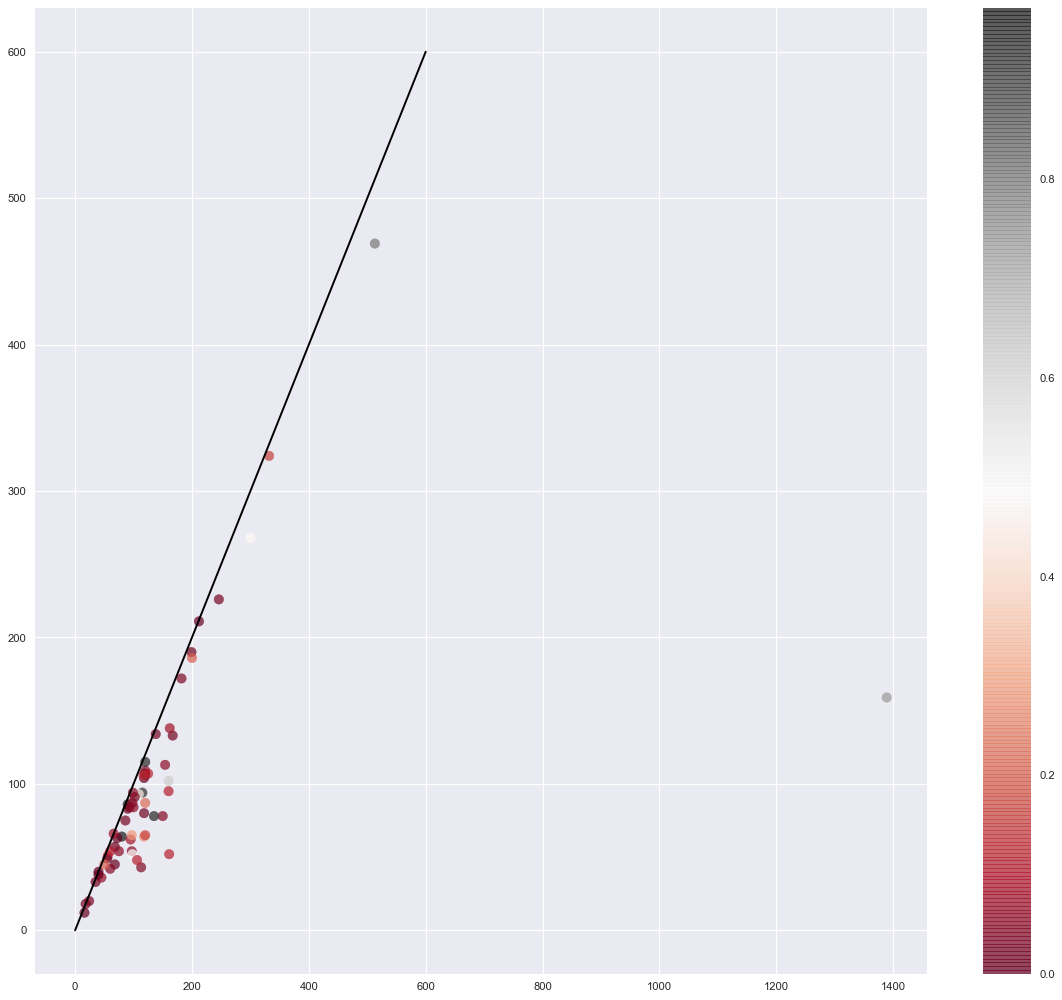

In [99]:
# http://matplotlib.org/1.4.3/examples/color/colormaps_reference.html
# https://stackoverflow.com/questions/30353363/seaborn-regplot-with-colorbar
# https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger

fig=plt.pyplot.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

points = plt.pyplot.scatter(
    table_bed_capacity_wo_all['number_of_certified_beds'],
    table_bed_capacity_wo_all['number_of_residents_in_certified_beds'],
    c = table_bed_capacity_wo_all['three_quarter_average'],
    alpha = .7,
    s = 75,
    cmap = 'RdGy')


plt.pyplot.colorbar(points)

x=np.linspace(0,600,601) 
plt.pyplot.plot(x,x,'k-')